<a href="https://colab.research.google.com/github/kunaldeep28/ML-Projects/blob/master/Fashion_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P39-Fashion-MNIST-Datasets.zip
!unzip P39-Fashion-MNIST-Datasets.zip

--2020-05-24 05:19:52--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P39-Fashion-MNIST-Datasets.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.88.152
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.88.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36315660 (35M) [application/zip]
Saving to: ‘P39-Fashion-MNIST-Datasets.zip’

P39-Fashion-MNIST-D 100%[===================>]  34.63M  20.7MB/s    in 1.7s    

2020-05-24 05:19:54 (20.7 MB/s) - ‘P39-Fashion-MNIST-Datasets.zip’ saved [36315660/36315660]

Archive:  P39-Fashion-MNIST-Datasets.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  


## Context
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

## Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


## Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


## TL;DR

Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)
Acknowledgements
Original dataset was downloaded from https://github.com/zalandoresearch/fashion-mnist

Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv/

## License
The MIT License (MIT) Copyright © [2017] Zalando SE, https://tech.zalando.com

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Data

In [0]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep=',')

In [0]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep=',')

# Visualizing the Data

In [31]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [32]:
fashion_train_df.shape

(60000, 785)

In [33]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [34]:
fashion_test_df.shape

(10000, 785)

In [0]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')

6.0

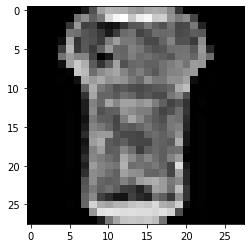

In [38]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i,1:].reshape(28, 28))
plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray')
label = training[i,0]
label

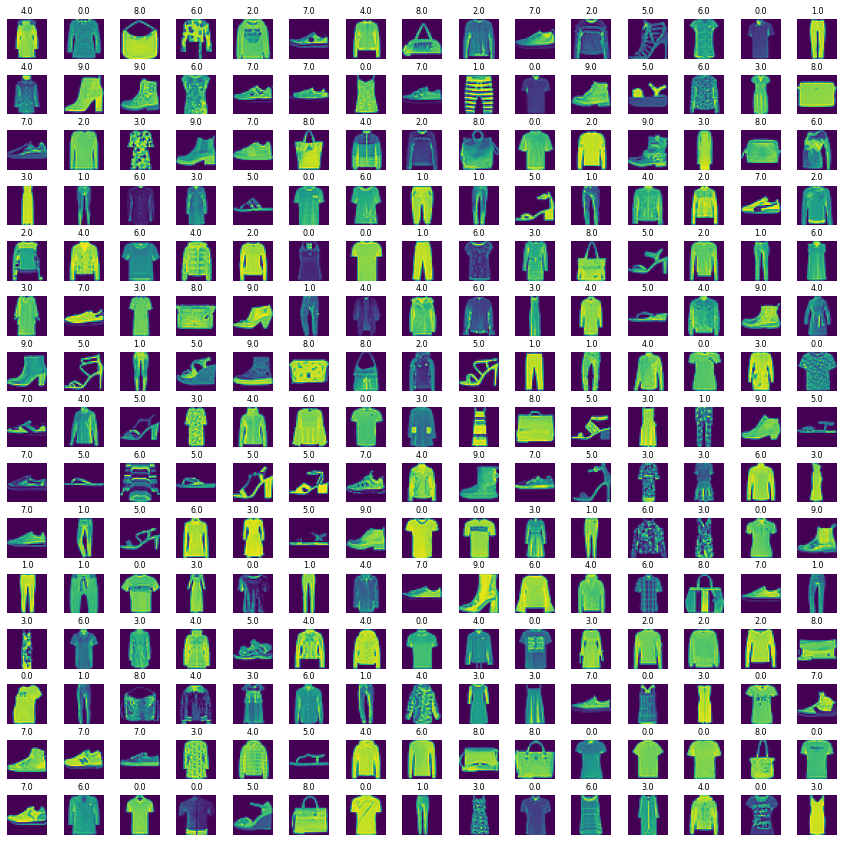

In [39]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))

axes = axes.ravel()

n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(training[index, 1:].reshape(28, 28))
  axes[i].set_title(training[index, 0], fontsize = 8)
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Model Training

In [0]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

In [0]:
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [0]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_val = X_val.reshape(X_val.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [44]:
X_train.shape

(48000, 28, 28, 1)

In [45]:
X_test.shape

(10000, 28, 28, 1)

In [46]:
X_val.shape

(12000, 28, 28, 1)

In [0]:
import keras

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:
cnn_model = Sequential()

In [0]:
cnn_model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation='relu'))

In [0]:
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
cnn_model.add(Flatten())

In [0]:
cnn_model.add(Dense(units = 32, activation='relu'))

In [0]:
cnn_model.add(Dense(units = 10, activation='softmax'))

In [0]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [56]:
epochs = 50
cnn_model.fit(X_train, 
              y_train, 
              batch_size = 512, 
              epochs = epochs, 
              verbose = 1, 
              validation_data = (X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 32us/step - loss: 0.8207 - accuracy: 0.7373 - val_loss: 0.4912 - val_accuracy: 0.8286
Epoch 2/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.4446 - accuracy: 0.8461 - val_loss: 0.4005 - val_accuracy: 0.8626
Epoch 3/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.3901 - accuracy: 0.8656 - val_loss: 0.3774 - val_accuracy: 0.8683
Epoch 4/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.3583 - accuracy: 0.8756 - val_loss: 0.3424 - val_accuracy: 0.8810
Epoch 5/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.3296 - accuracy: 0.8857 - val_loss: 0.3416 - val_accuracy: 0.8808
Epoch 6/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.3133 - accuracy: 0.8905 - val_loss: 0.3132 - val_accuracy: 0.8922
Epoch 7/50
48000/48000 [==============================] - 1s 27us/st

# Evaluating the Model

In [59]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test accuracy : {:.3f} %'.format(evaluation[1]*100))

10000/10000 [==============================] - 1s 81us/step
Test accuracy : 91.480 %


In [61]:
predicted_classes = cnn_model.predict_classes(X_test)
print(predicted_classes)

[0 1 2 ... 8 8 1]


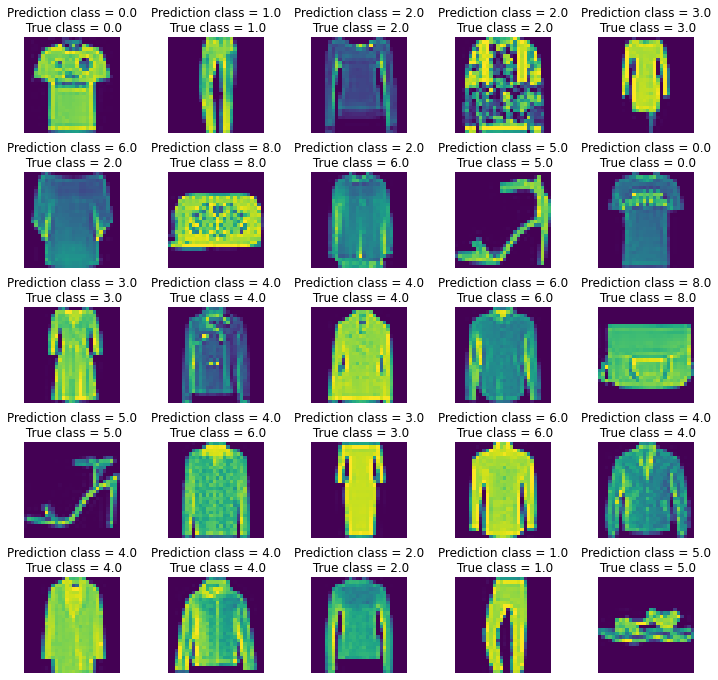

In [63]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
  axes[i].imshow(X_test[i].reshape(28, 28))
  axes[i].set_title('Prediction class = {:.1f}\n True class = {:.1f}'.format(predicted_classes[i], y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

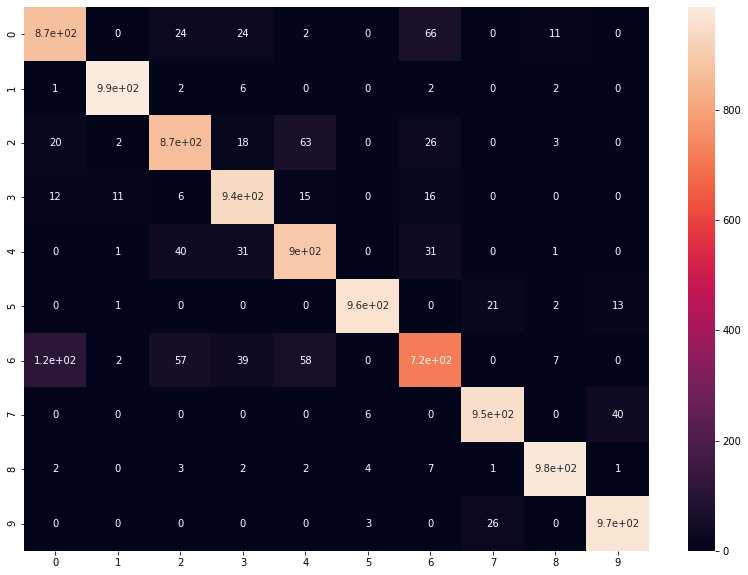

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot = True)

In [69]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.87      0.86      1000
     Class 1       0.98      0.99      0.99      1000
     Class 2       0.87      0.87      0.87      1000
     Class 3       0.89      0.94      0.91      1000
     Class 4       0.86      0.90      0.88      1000
     Class 5       0.99      0.96      0.97      1000
     Class 6       0.83      0.72      0.77      1000
     Class 7       0.95      0.95      0.95      1000
     Class 8       0.97      0.98      0.98      1000
     Class 9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# Improving the Model

Changeing kernal size to 64

In [0]:
cnn_model = Sequential()
cnn_model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 32, activation='relu'))
cnn_model.add(Dense(units = 10, activation='sigmoid'))
cnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [77]:
cnn_model.fit(X_train, 
              y_train, 
              batch_size = 512, 
              epochs = 50, 
              verbose = 1, 
              validation_data = (X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 48us/step - loss: 0.8632 - accuracy: 0.7218 - val_loss: 0.4932 - val_accuracy: 0.8302
Epoch 2/50
48000/48000 [==============================] - 2s 43us/step - loss: 0.4480 - accuracy: 0.8426 - val_loss: 0.4039 - val_accuracy: 0.8612
Epoch 3/50
48000/48000 [==============================] - 2s 42us/step - loss: 0.3889 - accuracy: 0.8627 - val_loss: 0.3685 - val_accuracy: 0.8737
Epoch 4/50
48000/48000 [==============================] - 2s 43us/step - loss: 0.3533 - accuracy: 0.8768 - val_loss: 0.3502 - val_accuracy: 0.8761
Epoch 5/50
48000/48000 [==============================] - 2s 43us/step - loss: 0.3342 - accuracy: 0.8833 - val_loss: 0.3292 - val_accuracy: 0.8842
Epoch 6/50
48000/48000 [==============================] - 2s 42us/step - loss: 0.3114 - accuracy: 0.8915 - val_loss: 0.3120 - val_accuracy: 0.8894
Epoch 7/50
48000/48000 [==============================] - 2s 43us/st

In [78]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test accuracy : {:.3f} %'.format(evaluation[1]*100))

10000/10000 [==============================] - 1s 86us/step
Test accuracy : 91.470 %


In [79]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

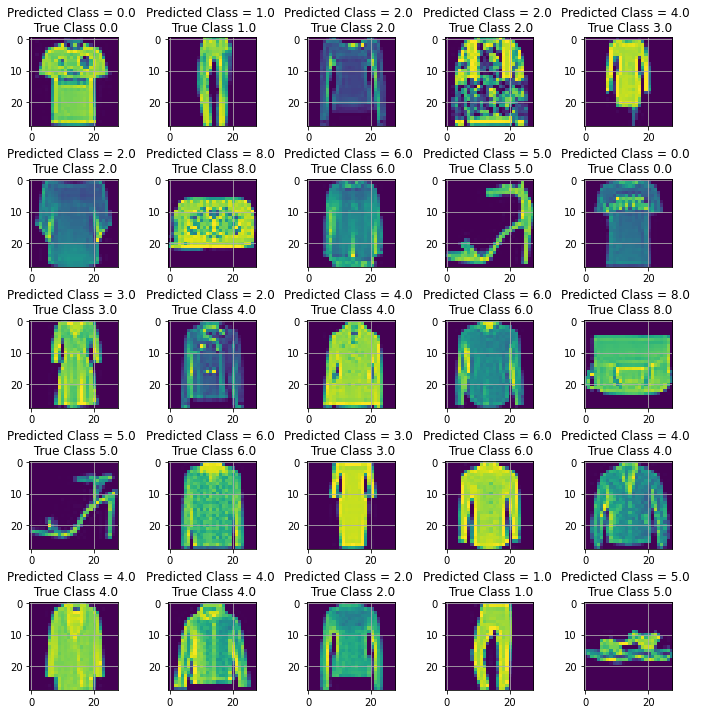

In [83]:
W = 5
L = 5
fig, axes = plt.subplots(W, L, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, W * L):
  axes[i].imshow(X_test[i].reshape(28, 28))
  axes[i].set_title('Predicted Class = {:.1f} \n True Class {:.1f}'.format(predicted_classes[i], y_test[i]))
  axes[i].grid('off')
plt.subplots_adjust(hspace=0.6)

In [84]:
num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.85      0.86      1000
     Class 1       0.98      0.99      0.98      1000
     Class 2       0.87      0.87      0.87      1000
     Class 3       0.91      0.92      0.91      1000
     Class 4       0.88      0.86      0.87      1000
     Class 5       0.97      0.98      0.98      1000
     Class 6       0.77      0.78      0.78      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



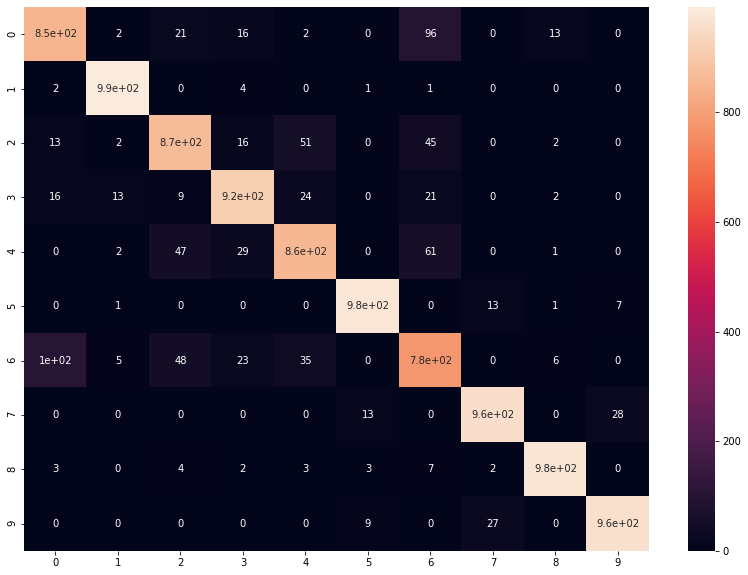

In [86]:
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True)

### Adding Dropout

In [0]:
cnn_model = Sequential()
cnn_model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 32, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units = 10, activation='sigmoid'))
cnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [92]:
cnn_model.fit(X_train, 
              y_train, 
              batch_size = 512, 
              epochs = 50, 
              verbose = 1, 
              validation_data = (X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 49us/step - loss: 1.2981 - accuracy: 0.5804 - val_loss: 0.5944 - val_accuracy: 0.7977
Epoch 2/50
48000/48000 [==============================] - 2s 43us/step - loss: 0.6836 - accuracy: 0.7748 - val_loss: 0.4322 - val_accuracy: 0.8446
Epoch 3/50
48000/48000 [==============================] - 2s 43us/step - loss: 0.5454 - accuracy: 0.8165 - val_loss: 0.3872 - val_accuracy: 0.8610
Epoch 4/50
48000/48000 [==============================] - 2s 42us/step - loss: 0.4724 - accuracy: 0.8399 - val_loss: 0.3506 - val_accuracy: 0.8767
Epoch 5/50
48000/48000 [==============================] - 2s 43us/step - loss: 0.4229 - accuracy: 0.8541 - val_loss: 0.3374 - val_accuracy: 0.8773
Epoch 6/50
48000/48000 [==============================] - 2s 43us/step - loss: 0.3908 - accuracy: 0.8639 - val_loss: 0.3138 - val_accuracy: 0.8883
Epoch 7/50
48000/48000 [==============================] - 2s 43us/st

In [93]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test accuracy : {:.3f} %'.format(evaluation[1]*100))

10000/10000 [==============================] - 1s 89us/step
Test accuracy : 91.660 %


In [94]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

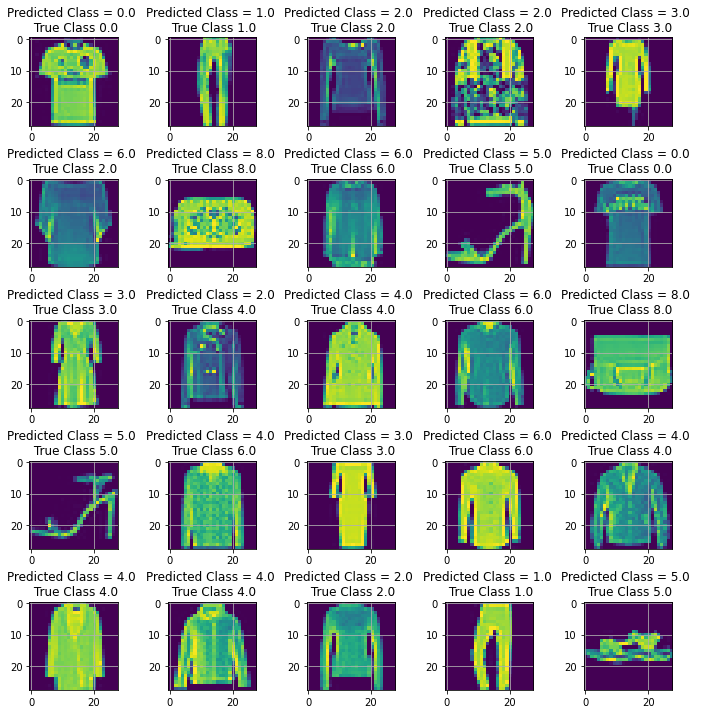

In [95]:
W = 5
L = 5
fig, axes = plt.subplots(W, L, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, W * L):
  axes[i].imshow(X_test[i].reshape(28, 28))
  axes[i].set_title('Predicted Class = {:.1f} \n True Class {:.1f}'.format(predicted_classes[i], y_test[i]))
  axes[i].grid('off')
plt.subplots_adjust(hspace=0.6)

In [96]:
num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.89      0.86      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.88      0.86      0.87      1000
     Class 3       0.91      0.93      0.92      1000
     Class 4       0.87      0.90      0.88      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.80      0.72      0.76      1000
     Class 7       0.95      0.96      0.96      1000
     Class 8       0.99      0.97      0.98      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



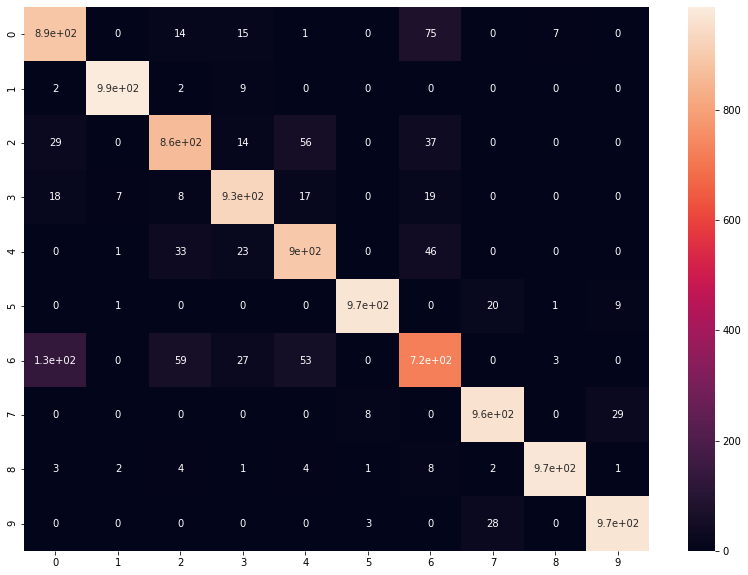

In [97]:
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True)